# EDA Using Python

### important libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#data importing
t= pd.read_csv('titanic.csv')

In [13]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### missing data
we use heatmap to see missing data

In [15]:

t.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

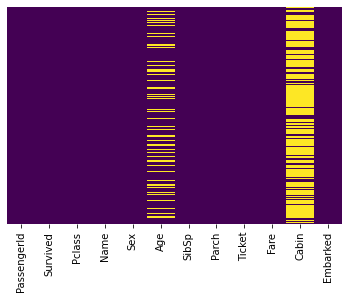

In [20]:
sns.heatmap(t.isnull(),yticklabels=False,cbar=False,cmap='viridis')

roughly 20% of the age data is missing.the proportion of age missing is likely small enough for reasonable replacement with somefrom of imputation.looking at cabin column.it looks like we are just missing too much of thr data to do something useful replAcement with basic level.we'll probably drop this later or change it to another feature like cabin known as 1 or 0


<AxesSubplot:xlabel='Survived', ylabel='count'>

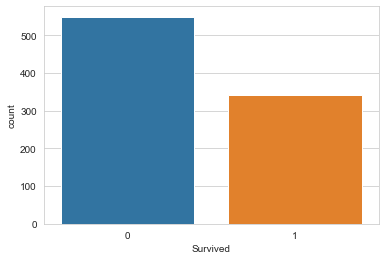

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=t)

<AxesSubplot:xlabel='Survived', ylabel='count'>

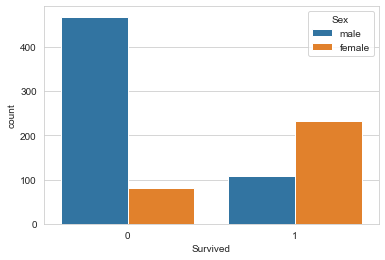

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=t)

<AxesSubplot:xlabel='Survived', ylabel='count'>

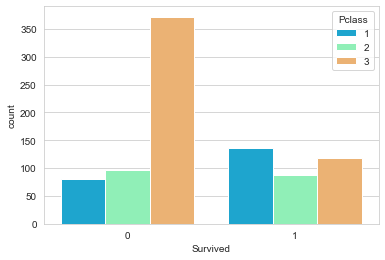

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=t,palette='rainbow')

<AxesSubplot:xlabel='Age'>

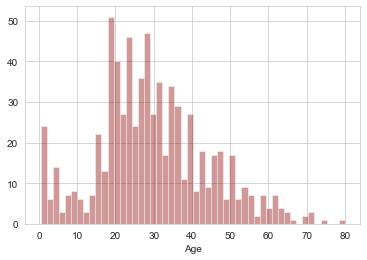

In [28]:
sns.distplot(t['Age'].dropna(),kde=False,color='darkred',bins=50)

<AxesSubplot:>

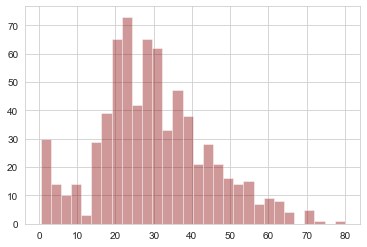

In [32]:
t['Age'].hist(bins=30,color='darkred',alpha=0.4)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

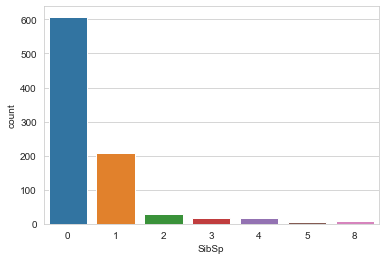

In [33]:
sns.countplot(x='SibSp',data=t)

<AxesSubplot:>

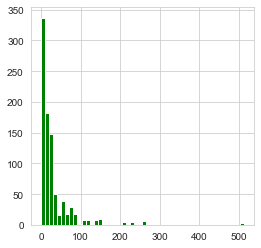

In [37]:
t['Fare'].hist(color='green',bins=50,figsize=(4,4))

### data Cleaning
we want to fill missing age data instead of just dropping data rows.one wayto do this is filling the mean age of all the passangers.however we can be smarter and check the average age by passangers class 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

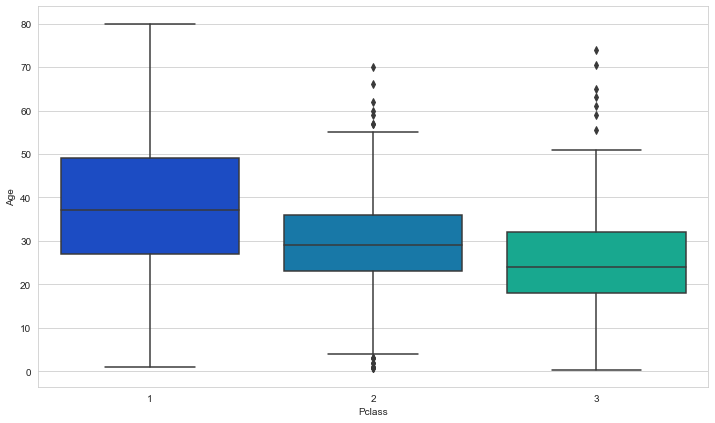

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=t,palette='winter')

we can see trhe weather in the higher class tend to be older.which makes sense.we'll use these average age value to impute based on pclass for age.

In [44]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [45]:
t['Age']=t[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

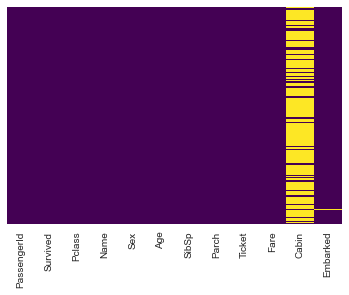

In [47]:
sns.heatmap(t.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
t.drop('Cabin',axis=1,inplace=True)

In [50]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

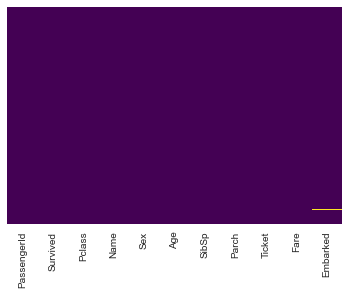

In [51]:
sns.heatmap(t.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [53]:
t.dropna(inplace=True)

## Converting Categorical Feature
 we will need tp cobvert categorical feature to dummy variables using pandas otherwise our machine learning algorith won't be able to directly take in those feature as input

In [54]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [56]:
pd.get_dummies(t['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
sex=pd.get_dummies(t['Sex'],drop_first=True)
embark=pd.get_dummies(t['Embarked'],drop_first=True)

In [59]:
t.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [60]:
t.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [61]:
t=pd.concat([t,sex,embark],axis=1)

In [62]:
t.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Bulding logistic regression madel

#### train test split

In [75]:
a=t.drop('Survived',axis=1).head()
a

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [80]:
b=t['Survived'].head()
b

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(a,b,test_size=0.30,random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel=LogisticRegression


In [92]:
logmodel.fit(X_train,y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [93]:
predictions =logmodel.predict(X_test)

TypeError: predict() missing 1 required positional argument: 'X'